In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
base_dados = pd.read_csv('/content/Suicide_Ideation_Dataset(Twitter-based).csv', sep = ",")

Exibindo a base de dados

In [ ]:
display(base_dados)

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


Preparando os dados para treinar um modelo de classificação binária substituindo o 'Potential Suicide post ' para 1 e 'Not Suicide post' para 0 na coluna 'Suicide' do DataFrame

In [ ]:
mapeamento = {'Potential Suicide post ': 1, 'Not Suicide post': 0}
df = pd.DataFrame(base_dados)
base_dados['Suicide'] = base_dados['Suicide'].replace(mapeamento)
#mapeando os dados substituindo por numeros para melhor eficacia do modelo

Agora vamos reorganizar as observações em uma ordem aleatória para Reduzir o Viés de Ordem e melhorar a Generalização

In [ ]:
#embaralhando os dados
lista_de_dicionarios = base_dados.to_dict('records')
random.shuffle(lista_de_dicionarios)
df_embaralhado = pd.DataFrame(lista_de_dicionarios)

Garantindo que todos os dados da coluna Tweet seja String

In [ ]:
df_embaralhado['Tweet'] = df_embaralhado['Tweet'].astype(str)

Preparando os dados de texto para treinamento para o modelo de aprendizado divindindoos dados em treinamento, validação e teste.Realizando a tokenização das palavras, que converte o texto em sequências numéricas e padroniza essas sequências para que todas tenham o mesmo comprimento

In [ ]:
# Dividir os dados em conjuntos de treinamento, validação e teste
train_df, test_df = train_test_split(df_embaralhado, test_size=0.2, random_state=42)#random_state dúvida
#nesta linha estamos dividindo em treino e teste
#20% são usados para para o teste df Os restantes 80% serão mantidos como conjunto de treinamento
#treinamento:tran
#conjunto de validação: balanceamento está certo está errado
#teste: mede o desempenho final
#Agora, após essa linha de código, train_df conterá 80% dos dados para treinamento e test_df conterá 20% dos dados para teste.
#criando o val_df
#train_df tem 64% dos dados e 16%
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
# Tokenização e padronização das sequências para treinamento
#padranzação 0 padronização de comprimento
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Tweet'])
#ajustei o tokenizer aos dados de texto de treinamento
train_sequences = tokenizer.texts_to_sequences(train_df['Tweet'])
#são as letras tranformadas em números
#junção da padronização e do e das palavras tokenizadas
train_padded = pad_sequences(train_sequences, padding='post')
# Tokenização e padronização das sequências para validação
val_sequences = tokenizer.texts_to_sequences(val_df['Tweet'])
#junção da padronização e do e das palavras tokenizadas
val_padded = pad_sequences(val_sequences, padding='post')
# Tokenização e padronização das sequências para teste
test_sequences = tokenizer.texts_to_sequences(test_df['Tweet'])
#junção da padronização e do e das palavras tokenizadas
test_padded = pad_sequences(test_sequences, padding='post')

Agora vamos construir, compilar e treinar um modelo de aprendizado de máquina para tarefa de classificação binária, onde o modelo deve ser capaz de classificar textos em duas categorias: suicida ou não suicida

Vamos verificar a perda "Loss" e verificar a "Accuracy" a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.

In [ ]:
# Construir o modelo
model = tf.keras.Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, mask_zero=True),  # Aumentar a dimensão da Embedding
    Bidirectional(LSTM(128, return_sequences=True)),  # Adicionar return_sequences=True para manter as saídas em todas as etapas
    Bidirectional(LSTM(64)),  # Adicionar outra camada Bidirectional LSTM
    Dense(128, activation='relu'),  # Aumentar a complexidade da camada densa
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_padded, train_df['Suicide'].values, epochs=20, batch_size=32, validation_data=(val_padded, val_df['Suicide'].values))

# Validar o modelo nos dados de teste
test_loss, test_accuracy = model.evaluate(test_padded, test_df['Suicide'].values)
print(f"Loss nos dados de teste: {test_loss}")
print(f"Acurácia nos dados de teste: {test_accuracy}")


Epoch 1/20
36/36 [==============================] - 88s 2s/step - loss: 0.4930 - accuracy: 0.7839 - val_loss: 0.2502 - val_accuracy: 0.9021
Epoch 2/20
36/36 [==============================] - 62s 2s/step - loss: 0.0655 - accuracy: 0.9834 - val_loss: 0.3827 - val_accuracy: 0.8986
Epoch 3/20
36/36 [==============================] - 60s 2s/step - loss: 0.0397 - accuracy: 0.9886 - val_loss: 0.2869 - val_accuracy: 0.9231
Epoch 4/20
36/36 [==============================] - 63s 2s/step - loss: 0.0140 - accuracy: 0.9974 - val_loss: 0.2737 - val_accuracy: 0.9161
Epoch 5/20
36/36 [==============================] - 59s 2s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.3607 - val_accuracy: 0.9161
Epoch 6/20
36/36 [==============================] - 63s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3955 - val_accuracy: 0.9161
Epoch 7/20
36/36 [==============================] - 63s 2s/step - loss: 9.5463e-04 - accuracy: 1.0000 - val_loss: 0.4243 - val_accuracy: 0.9196
Epoch 8/20
36/36

Mostrando a evolução da acurácia do modelo de aprendizado de máquina ao longo das épocas durante o treinamento

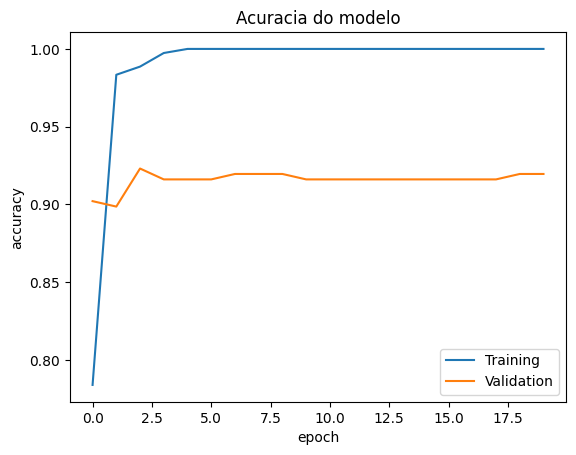

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acuracia do modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training','Validation'], loc='lower right')

Com base no relatorio da classificação o modelo demonstra um desempenho excelente na tarefa de classificação binária. Ele tem alta precisão, alto recall e alto F1-score para ambas as classes. A acurácia geral também é muito alta.

Recall 97% classe 0 92% classe 1 = quer dizer Quantos dos casos reais positivos o modelo conseguiu identificar?

Precisão: 95 e 95 verfica se previsões positivas do seu modelo são precisas

F1 score: é uma métrica que combina as métricas de "precision" (precisão) e "recall"

support:número de amostras

12/12 [==============================] - 9s 262ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       233
           1       0.89      0.87      0.88       125

    accuracy                           0.92       358
   macro avg       0.91      0.91      0.91       358
weighted avg       0.92      0.92      0.92       358



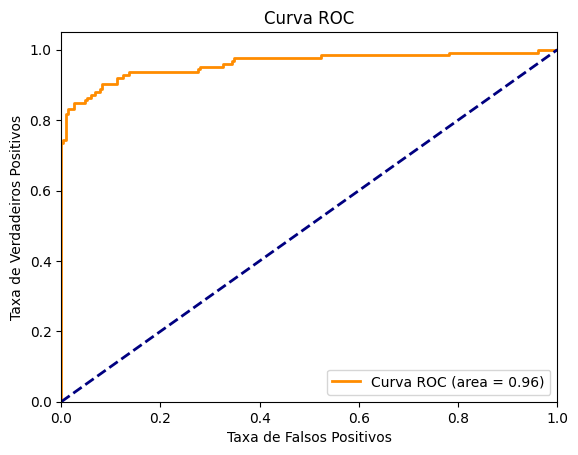

In [ ]:
# Fazer previsões nos dados de teste
test_predictions = model.predict(test_padded)
test_predictions_rounded = np.round(test_predictions)

# Calcular matriz de confusão
confusion = confusion_matrix(test_df['Suicide'], test_predictions_rounded)

# Calcular o F1 score e imprimir relatório de classificação
f1 = classification_report(test_df['Suicide'], test_predictions_rounded)
print("Relatório de Classificação:")
print(f1)

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(test_df['Suicide'], test_predictions)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Função para fazer previsões em um tweet e interpretar a saída
def fazer_previsao_e_interpretar(model, tweet, tokenizer):
    # Pré-processar o tweet
    tweet = [tweet]  # Converter para uma lista
    tweet = tokenizer.texts_to_sequences(tweet)
    tweet = pad_sequences(tweet, padding='post')

    # Fazer a previsão
    previsao = model.predict(tweet)

    # Interpretar a saída do modelo
    if previsao >= 0.5:
        resultado = "Possivel Suicídio"  # Se a probabilidade for maior ou igual a 0,5, classificamos como "Suicídio"
    else:
        resultado = "Não Suicídio"  # Caso contrário, classificamos como "Não Suicídio"

    return resultado



In [ ]:
tweet = "I want to die, I'm sad"

# Fazer a previsão usando a função
resultado = fazer_previsao_e_interpretar(model,tweet, tokenizer)
print(f"A previsão para o tweet é: {resultado}")


1/1 [==============================] - 6s 6s/step
A previsão para o tweet é: Possivel Suicídio
